In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import train_cluster_cifar_dfca_tf as DFCA
import pickle

import numpy as np

from util import *

2025-06-11 15:13:35.603392: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
# theoretically irrelevant here because we initialize the model seed randomly (see find_good_initializer())
seeds = [11,12,13,14,15]
learning_rates = [0.25]

dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [3]:
import json
import time
import torch
import numpy as np


with open("config.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)

        exp = DFCA.TrainCIFARCluster(config)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



---------------------------------DFCA-GI, lr: 0.25, seed: 11---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 400, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 11, 'train_seed': 11, 'project_dir': 'output'}


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


I0000 00:00:1749647619.863389  247519 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


finding good initializer from train data


2025-06-11 15:13:40.374998: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 15:13:44.417834: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 15:13:48.074898: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 15:13:51.738019: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 15:13:55.458872: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 15:13:59.089870: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 15:14:02.761345: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 15:14:06.405316: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 15:14:10.068169: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 15:14:13.710033: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 15:14:17.307262: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 15:14:20.957072: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 15:14:24.640984: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 15:14:28.273025: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 15:14:31.939286: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


found good initializer


Epoch 0 tr: l 4.573 a 0.133  clct[28, 32] ans[29, 31] lr 0.250000 cl_acc 0.550 44.260sec(train) 4.101sec(infer)


Epoch 0 tst: l 4.591 a 0.119  clct[17, 23] ans[20, 20] cl_acc 0.525 2.597sec
result written at output/results.pickle


Epoch 10 tr: l 3.713 a 0.293  clct[57, 3] ans[30, 30] lr 0.226096 cl_acc 0.517 44.330sec(train) 3.872sec(infer)


Epoch 10 tst: l 3.685 a 0.297  clct[35, 5] ans[20, 20] cl_acc 0.525 2.484sec
result written at output/results.pickle


Epoch 20 tr: l 3.079 a 0.370  clct[60, 0] ans[29, 31] lr 0.204477 cl_acc 0.517 43.760sec(train) 4.207sec(infer)


Epoch 20 tst: l 3.110 a 0.372  clct[39, 1] ans[20, 20] cl_acc 0.525 2.637sec
result written at output/results.pickle


Epoch 30 tr: l 2.687 a 0.404  clct[60, 0] ans[33, 27] lr 0.184925 cl_acc 0.550 44.376sec(train) 4.199sec(infer)


Epoch 30 tst: l 2.676 a 0.416  clct[40, 0] ans[20, 20] cl_acc 0.500 2.569sec
result written at output/results.pickle


Epoch 40 tr: l 2.411 a 0.440  clct[60, 0] ans[30, 30] lr 0.167243 cl_acc 0.500 44.319sec(train) 4.216sec(infer)


Epoch 40 tst: l 2.375 a 0.456  clct[40, 0] ans[20, 20] cl_acc 0.500 2.578sec
result written at output/results.pickle


Epoch 50 tr: l 2.158 a 0.486  clct[60, 0] ans[30, 30] lr 0.151252 cl_acc 0.500 44.265sec(train) 4.023sec(infer)


Epoch 50 tst: l 2.181 a 0.478  clct[40, 0] ans[20, 20] cl_acc 0.500 2.459sec
result written at output/results.pickle


Epoch 60 tr: l 2.029 a 0.500  clct[60, 0] ans[28, 32] lr 0.136789 cl_acc 0.533 44.281sec(train) 4.094sec(infer)


Epoch 60 tst: l 2.005 a 0.507  clct[40, 0] ans[20, 20] cl_acc 0.500 2.716sec
result written at output/results.pickle


Epoch 70 tr: l 1.850 a 0.541  clct[60, 0] ans[29, 31] lr 0.123710 cl_acc 0.517 43.913sec(train) 4.070sec(infer)


Epoch 70 tst: l 1.870 a 0.528  clct[40, 0] ans[20, 20] cl_acc 0.500 2.496sec
result written at output/results.pickle


Epoch 80 tr: l 1.779 a 0.545  clct[60, 0] ans[36, 24] lr 0.111881 cl_acc 0.600 43.939sec(train) 3.890sec(infer)


Epoch 80 tst: l 1.749 a 0.554  clct[40, 0] ans[20, 20] cl_acc 0.500 2.464sec
result written at output/results.pickle


Epoch 90 tr: l 1.636 a 0.581  clct[60, 0] ans[30, 30] lr 0.101183 cl_acc 0.500 43.644sec(train) 3.922sec(infer)


Epoch 90 tst: l 1.674 a 0.567  clct[40, 0] ans[20, 20] cl_acc 0.500 2.419sec
result written at output/results.pickle


Epoch 100 tr: l 1.591 a 0.586  clct[60, 0] ans[29, 31] lr 0.091508 cl_acc 0.517 43.571sec(train) 4.182sec(infer)


Epoch 100 tst: l 1.575 a 0.584  clct[40, 0] ans[20, 20] cl_acc 0.500 2.484sec
result written at output/results.pickle


Epoch 110 tr: l 1.520 a 0.602  clct[60, 0] ans[27, 33] lr 0.082758 cl_acc 0.550 44.224sec(train) 3.970sec(infer)


Epoch 110 tst: l 1.504 a 0.602  clct[40, 0] ans[20, 20] cl_acc 0.500 2.391sec
result written at output/results.pickle


Epoch 120 tr: l 1.448 a 0.618  clct[60, 0] ans[36, 24] lr 0.074845 cl_acc 0.600 43.636sec(train) 3.703sec(infer)


Epoch 120 tst: l 1.449 a 0.612  clct[40, 0] ans[20, 20] cl_acc 0.500 2.317sec
result written at output/results.pickle


Epoch 130 tr: l 1.389 a 0.633  clct[60, 0] ans[34, 26] lr 0.067689 cl_acc 0.567 44.287sec(train) 3.963sec(infer)


Epoch 130 tst: l 1.411 a 0.618  clct[40, 0] ans[20, 20] cl_acc 0.500 2.341sec
result written at output/results.pickle


Epoch 140 tr: l 1.346 a 0.641  clct[60, 0] ans[35, 25] lr 0.061216 cl_acc 0.583 43.601sec(train) 3.735sec(infer)


Epoch 140 tst: l 1.382 a 0.621  clct[40, 0] ans[20, 20] cl_acc 0.500 2.395sec
result written at output/results.pickle


Epoch 150 tr: l 1.305 a 0.650  clct[60, 0] ans[35, 25] lr 0.055363 cl_acc 0.583 43.574sec(train) 3.871sec(infer)


Epoch 150 tst: l 1.316 a 0.641  clct[40, 0] ans[20, 20] cl_acc 0.500 2.420sec
result written at output/results.pickle


Epoch 160 tr: l 1.269 a 0.655  clct[60, 0] ans[31, 29] lr 0.050069 cl_acc 0.517 43.700sec(train) 3.988sec(infer)


Epoch 160 tst: l 1.308 a 0.639  clct[40, 0] ans[20, 20] cl_acc 0.500 2.345sec
result written at output/results.pickle


Epoch 170 tr: l 1.268 a 0.651  clct[60, 0] ans[28, 32] lr 0.045282 cl_acc 0.533 44.318sec(train) 3.619sec(infer)


Epoch 170 tst: l 1.278 a 0.648  clct[40, 0] ans[20, 20] cl_acc 0.500 2.177sec
result written at output/results.pickle


Epoch 180 tr: l 1.222 a 0.660  clct[60, 0] ans[31, 29] lr 0.040952 cl_acc 0.517 44.391sec(train) 3.604sec(infer)


Epoch 180 tst: l 1.259 a 0.646  clct[40, 0] ans[20, 20] cl_acc 0.500 2.230sec
result written at output/results.pickle


Epoch 190 tr: l 1.206 a 0.669  clct[60, 0] ans[24, 36] lr 0.037036 cl_acc 0.600 44.391sec(train) 3.717sec(infer)


Epoch 190 tst: l 1.231 a 0.658  clct[40, 0] ans[20, 20] cl_acc 0.500 2.317sec
result written at output/results.pickle


Epoch 200 tr: l 1.174 a 0.677  clct[60, 0] ans[32, 28] lr 0.033495 cl_acc 0.533 44.333sec(train) 3.777sec(infer)


Epoch 200 tst: l 1.194 a 0.666  clct[40, 0] ans[20, 20] cl_acc 0.500 2.228sec
result written at output/results.pickle


Epoch 210 tr: l 1.133 a 0.692  clct[60, 0] ans[32, 28] lr 0.030292 cl_acc 0.533 44.410sec(train) 3.657sec(infer)


Epoch 210 tst: l 1.195 a 0.665  clct[40, 0] ans[20, 20] cl_acc 0.500 2.247sec
result written at output/results.pickle


Epoch 220 tr: l 1.119 a 0.692  clct[60, 0] ans[31, 29] lr 0.027396 cl_acc 0.517 43.598sec(train) 3.720sec(infer)


Epoch 220 tst: l 1.182 a 0.670  clct[40, 0] ans[20, 20] cl_acc 0.500 2.270sec
result written at output/results.pickle


Epoch 230 tr: l 1.113 a 0.692  clct[60, 0] ans[29, 31] lr 0.024776 cl_acc 0.517 44.336sec(train) 3.872sec(infer)


Epoch 230 tst: l 1.165 a 0.675  clct[40, 0] ans[20, 20] cl_acc 0.500 2.440sec
result written at output/results.pickle


Epoch 240 tr: l 1.093 a 0.699  clct[60, 0] ans[27, 33] lr 0.022407 cl_acc 0.550 44.372sec(train) 3.994sec(infer)


Epoch 240 tst: l 1.148 a 0.678  clct[40, 0] ans[20, 20] cl_acc 0.500 2.535sec
result written at output/results.pickle


Epoch 250 tr: l 1.094 a 0.698  clct[60, 0] ans[36, 24] lr 0.020265 cl_acc 0.600 43.731sec(train) 4.046sec(infer)


Epoch 250 tst: l 1.148 a 0.678  clct[40, 0] ans[20, 20] cl_acc 0.500 2.585sec
result written at output/results.pickle


Epoch 260 tr: l 1.091 a 0.695  clct[60, 0] ans[30, 30] lr 0.018327 cl_acc 0.500 43.819sec(train) 3.751sec(infer)


Epoch 260 tst: l 1.132 a 0.682  clct[40, 0] ans[20, 20] cl_acc 0.500 2.285sec
result written at output/results.pickle


Epoch 270 tr: l 1.061 a 0.706  clct[60, 0] ans[34, 26] lr 0.016575 cl_acc 0.567 43.688sec(train) 3.769sec(infer)


Epoch 270 tst: l 1.139 a 0.679  clct[40, 0] ans[20, 20] cl_acc 0.500 2.372sec
result written at output/results.pickle


Epoch 280 tr: l 1.072 a 0.698  clct[60, 0] ans[32, 28] lr 0.014990 cl_acc 0.533 44.046sec(train) 4.040sec(infer)


Epoch 280 tst: l 1.102 a 0.692  clct[40, 0] ans[20, 20] cl_acc 0.500 2.536sec
result written at output/results.pickle


Epoch 290 tr: l 1.026 a 0.714  clct[60, 0] ans[31, 29] lr 0.013556 cl_acc 0.517 44.482sec(train) 4.032sec(infer)


Epoch 290 tst: l 1.103 a 0.689  clct[40, 0] ans[20, 20] cl_acc 0.500 2.430sec
result written at output/results.pickle


Epoch 300 tr: l 1.042 a 0.707  clct[60, 0] ans[30, 30] lr 0.012260 cl_acc 0.500 44.348sec(train) 3.985sec(infer)


Epoch 300 tst: l 1.089 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.487sec
result written at output/results.pickle


Epoch 310 tr: l 1.052 a 0.707  clct[60, 0] ans[32, 28] lr 0.011088 cl_acc 0.533 44.414sec(train) 3.770sec(infer)


Epoch 310 tst: l 1.100 a 0.689  clct[40, 0] ans[20, 20] cl_acc 0.500 2.338sec
result written at output/results.pickle


Epoch 320 tr: l 1.043 a 0.709  clct[60, 0] ans[24, 36] lr 0.010028 cl_acc 0.600 44.306sec(train) 3.978sec(infer)


Epoch 320 tst: l 1.076 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.472sec
result written at output/results.pickle


Epoch 330 tr: l 1.069 a 0.698  clct[60, 0] ans[29, 31] lr 0.009069 cl_acc 0.517 44.428sec(train) 3.931sec(infer)


Epoch 330 tst: l 1.086 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.484sec
result written at output/results.pickle


Epoch 340 tr: l 1.007 a 0.720  clct[60, 0] ans[27, 33] lr 0.008202 cl_acc 0.550 43.806sec(train) 3.954sec(infer)


Epoch 340 tst: l 1.073 a 0.697  clct[40, 0] ans[20, 20] cl_acc 0.500 2.418sec
result written at output/results.pickle


Epoch 350 tr: l 1.048 a 0.705  clct[60, 0] ans[22, 38] lr 0.007418 cl_acc 0.633 43.778sec(train) 3.936sec(infer)


Epoch 350 tst: l 1.066 a 0.701  clct[40, 0] ans[20, 20] cl_acc 0.500 2.495sec
result written at output/results.pickle


Epoch 360 tr: l 1.063 a 0.696  clct[60, 0] ans[24, 36] lr 0.006708 cl_acc 0.600 43.773sec(train) 4.026sec(infer)


Epoch 360 tst: l 1.056 a 0.704  clct[40, 0] ans[20, 20] cl_acc 0.500 2.533sec
result written at output/results.pickle


Epoch 370 tr: l 1.030 a 0.710  clct[60, 0] ans[32, 28] lr 0.006067 cl_acc 0.533 43.624sec(train) 3.926sec(infer)


Epoch 370 tst: l 1.061 a 0.701  clct[40, 0] ans[20, 20] cl_acc 0.500 2.422sec
result written at output/results.pickle


Epoch 380 tr: l 1.015 a 0.715  clct[60, 0] ans[26, 34] lr 0.005487 cl_acc 0.567 43.702sec(train) 3.955sec(infer)


Epoch 380 tst: l 1.045 a 0.706  clct[40, 0] ans[20, 20] cl_acc 0.500 2.474sec
result written at output/results.pickle


Epoch 390 tr: l 1.032 a 0.706  clct[60, 0] ans[31, 29] lr 0.004962 cl_acc 0.517 43.631sec(train) 3.732sec(infer)


Epoch 390 tst: l 1.056 a 0.701  clct[40, 0] ans[20, 20] cl_acc 0.500 2.279sec
result written at output/results.pickle


result written at output/results.pickle
---train cluster Ended in 5.61 hour (20206.708 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 12---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 400, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 12, 'train_seed': 12, 'project_dir': 'output'}


finding good initializer from train data


2025-06-11 20:50:26.550715: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 20:50:30.612795: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 20:50:34.389399: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-11 20:50:38.365071: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


found good initializer


Epoch 0 tr: l 4.592 a 0.130  clct[26, 34] ans[31, 29] lr 0.250000 cl_acc 0.550 44.203sec(train) 4.108sec(infer)


Epoch 0 tst: l 4.585 a 0.121  clct[23, 17] ans[20, 20] cl_acc 0.575 2.585sec
result written at output/results.pickle


Epoch 10 tr: l 3.689 a 0.292  clct[50, 10] ans[34, 26] lr 0.226096 cl_acc 0.667 43.728sec(train) 4.187sec(infer)


Epoch 10 tst: l 3.686 a 0.302  clct[36, 4] ans[20, 20] cl_acc 0.500 2.608sec
result written at output/results.pickle


Epoch 20 tr: l 3.071 a 0.372  clct[57, 3] ans[34, 26] lr 0.204477 cl_acc 0.617 44.135sec(train) 3.946sec(infer)


Epoch 20 tst: l 3.035 a 0.387  clct[40, 0] ans[20, 20] cl_acc 0.500 2.573sec
result written at output/results.pickle


Epoch 30 tr: l 2.696 a 0.407  clct[59, 1] ans[29, 31] lr 0.184925 cl_acc 0.500 44.039sec(train) 3.927sec(infer)


Epoch 30 tst: l 2.681 a 0.417  clct[40, 0] ans[20, 20] cl_acc 0.500 2.575sec
result written at output/results.pickle


Epoch 40 tr: l 2.421 a 0.441  clct[60, 0] ans[28, 32] lr 0.167243 cl_acc 0.533 43.759sec(train) 3.881sec(infer)


Epoch 40 tst: l 2.381 a 0.458  clct[40, 0] ans[20, 20] cl_acc 0.500 2.560sec
result written at output/results.pickle


Epoch 50 tr: l 2.232 a 0.465  clct[59, 1] ans[30, 30] lr 0.151252 cl_acc 0.517 43.876sec(train) 3.964sec(infer)


Epoch 50 tst: l 2.174 a 0.489  clct[40, 0] ans[20, 20] cl_acc 0.500 2.597sec
result written at output/results.pickle


Epoch 60 tr: l 2.015 a 0.505  clct[58, 2] ans[27, 33] lr 0.136789 cl_acc 0.517 44.353sec(train) 3.806sec(infer)


Epoch 60 tst: l 2.032 a 0.496  clct[40, 0] ans[20, 20] cl_acc 0.500 2.507sec
result written at output/results.pickle


Epoch 70 tr: l 1.866 a 0.538  clct[60, 0] ans[31, 29] lr 0.123710 cl_acc 0.517 44.200sec(train) 4.168sec(infer)


Epoch 70 tst: l 1.877 a 0.527  clct[40, 0] ans[20, 20] cl_acc 0.500 2.488sec
result written at output/results.pickle


Epoch 80 tr: l 1.777 a 0.546  clct[58, 2] ans[36, 24] lr 0.111881 cl_acc 0.633 44.235sec(train) 3.914sec(infer)


Epoch 80 tst: l 1.779 a 0.546  clct[40, 0] ans[20, 20] cl_acc 0.500 2.509sec
result written at output/results.pickle


Epoch 90 tr: l 1.660 a 0.572  clct[59, 1] ans[36, 24] lr 0.101183 cl_acc 0.617 43.470sec(train) 3.879sec(infer)


Epoch 90 tst: l 1.683 a 0.565  clct[40, 0] ans[20, 20] cl_acc 0.500 2.546sec
result written at output/results.pickle


Epoch 100 tr: l 1.574 a 0.592  clct[58, 2] ans[30, 30] lr 0.091508 cl_acc 0.533 44.174sec(train) 4.110sec(infer)


Epoch 100 tst: l 1.604 a 0.578  clct[40, 0] ans[20, 20] cl_acc 0.500 2.535sec
result written at output/results.pickle


Epoch 110 tr: l 1.519 a 0.602  clct[60, 0] ans[30, 30] lr 0.082758 cl_acc 0.500 44.215sec(train) 4.042sec(infer)


Epoch 110 tst: l 1.510 a 0.603  clct[40, 0] ans[20, 20] cl_acc 0.500 2.571sec
result written at output/results.pickle


Epoch 120 tr: l 1.436 a 0.620  clct[59, 1] ans[31, 29] lr 0.074845 cl_acc 0.533 43.459sec(train) 3.939sec(infer)


Epoch 120 tst: l 1.472 a 0.603  clct[40, 0] ans[20, 20] cl_acc 0.500 2.487sec
result written at output/results.pickle


Epoch 130 tr: l 1.405 a 0.623  clct[60, 0] ans[30, 30] lr 0.067689 cl_acc 0.500 43.683sec(train) 3.754sec(infer)


Epoch 130 tst: l 1.426 a 0.612  clct[40, 0] ans[20, 20] cl_acc 0.500 2.426sec
result written at output/results.pickle


Epoch 140 tr: l 1.380 a 0.626  clct[60, 0] ans[29, 31] lr 0.061216 cl_acc 0.517 43.956sec(train) 3.904sec(infer)


Epoch 140 tst: l 1.387 a 0.624  clct[40, 0] ans[20, 20] cl_acc 0.500 2.513sec
result written at output/results.pickle


Epoch 150 tr: l 1.300 a 0.648  clct[59, 1] ans[31, 29] lr 0.055363 cl_acc 0.533 43.711sec(train) 4.237sec(infer)


Epoch 150 tst: l 1.359 a 0.626  clct[40, 0] ans[20, 20] cl_acc 0.500 2.551sec
result written at output/results.pickle


Epoch 160 tr: l 1.284 a 0.651  clct[60, 0] ans[28, 32] lr 0.050069 cl_acc 0.533 44.201sec(train) 3.980sec(infer)


Epoch 160 tst: l 1.302 a 0.640  clct[40, 0] ans[20, 20] cl_acc 0.500 2.539sec
result written at output/results.pickle


Epoch 170 tr: l 1.317 a 0.634  clct[60, 0] ans[31, 29] lr 0.045282 cl_acc 0.517 43.541sec(train) 3.960sec(infer)


Epoch 170 tst: l 1.302 a 0.637  clct[40, 0] ans[20, 20] cl_acc 0.500 2.534sec
result written at output/results.pickle


Epoch 180 tr: l 1.227 a 0.663  clct[60, 0] ans[28, 32] lr 0.040952 cl_acc 0.533 44.266sec(train) 3.750sec(infer)


Epoch 180 tst: l 1.269 a 0.646  clct[40, 0] ans[20, 20] cl_acc 0.500 2.338sec
result written at output/results.pickle


Epoch 190 tr: l 1.184 a 0.677  clct[60, 0] ans[22, 38] lr 0.037036 cl_acc 0.633 43.520sec(train) 3.958sec(infer)


Epoch 190 tst: l 1.253 a 0.648  clct[40, 0] ans[20, 20] cl_acc 0.500 2.505sec
result written at output/results.pickle


Epoch 200 tr: l 1.231 a 0.656  clct[60, 0] ans[27, 33] lr 0.033495 cl_acc 0.550 42.707sec(train) 4.153sec(infer)


Epoch 200 tst: l 1.216 a 0.658  clct[40, 0] ans[20, 20] cl_acc 0.500 2.509sec
result written at output/results.pickle


Epoch 210 tr: l 1.160 a 0.679  clct[60, 0] ans[34, 26] lr 0.030292 cl_acc 0.567 43.316sec(train) 3.768sec(infer)


Epoch 210 tst: l 1.223 a 0.657  clct[40, 0] ans[20, 20] cl_acc 0.500 2.406sec
result written at output/results.pickle


Epoch 220 tr: l 1.125 a 0.690  clct[59, 1] ans[29, 31] lr 0.027396 cl_acc 0.500 42.591sec(train) 3.818sec(infer)


Epoch 220 tst: l 1.177 a 0.672  clct[40, 0] ans[20, 20] cl_acc 0.500 2.406sec
result written at output/results.pickle


Epoch 230 tr: l 1.123 a 0.687  clct[60, 0] ans[27, 33] lr 0.024776 cl_acc 0.550 42.468sec(train) 3.805sec(infer)


Epoch 230 tst: l 1.179 a 0.667  clct[40, 0] ans[20, 20] cl_acc 0.500 2.439sec
result written at output/results.pickle


Epoch 240 tr: l 1.112 a 0.692  clct[59, 1] ans[34, 26] lr 0.022407 cl_acc 0.583 43.324sec(train) 3.700sec(infer)


Epoch 240 tst: l 1.137 a 0.684  clct[40, 0] ans[20, 20] cl_acc 0.500 2.370sec
result written at output/results.pickle


Epoch 250 tr: l 1.068 a 0.702  clct[59, 1] ans[32, 28] lr 0.020265 cl_acc 0.550 43.261sec(train) 3.814sec(infer)


Epoch 250 tst: l 1.150 a 0.678  clct[40, 0] ans[20, 20] cl_acc 0.500 2.388sec
result written at output/results.pickle


Epoch 260 tr: l 1.051 a 0.709  clct[59, 1] ans[31, 29] lr 0.018327 cl_acc 0.533 43.204sec(train) 3.896sec(infer)


Epoch 260 tst: l 1.128 a 0.681  clct[40, 0] ans[20, 20] cl_acc 0.500 2.434sec
result written at output/results.pickle


Epoch 270 tr: l 1.048 a 0.710  clct[59, 1] ans[36, 24] lr 0.016575 cl_acc 0.617 43.212sec(train) 4.202sec(infer)


Epoch 270 tst: l 1.121 a 0.683  clct[40, 0] ans[20, 20] cl_acc 0.500 2.658sec
result written at output/results.pickle


Epoch 280 tr: l 1.065 a 0.701  clct[59, 1] ans[26, 34] lr 0.014990 cl_acc 0.550 43.108sec(train) 4.213sec(infer)


Epoch 280 tst: l 1.121 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.619sec
result written at output/results.pickle


Epoch 290 tr: l 1.056 a 0.705  clct[59, 1] ans[34, 26] lr 0.013556 cl_acc 0.583 43.107sec(train) 3.867sec(infer)


Epoch 290 tst: l 1.122 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.491sec
result written at output/results.pickle


Epoch 300 tr: l 1.049 a 0.704  clct[59, 1] ans[28, 32] lr 0.012260 cl_acc 0.517 43.102sec(train) 4.114sec(infer)


Epoch 300 tst: l 1.094 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.623sec
result written at output/results.pickle


Epoch 310 tr: l 1.047 a 0.709  clct[59, 1] ans[34, 26] lr 0.011088 cl_acc 0.583 42.316sec(train) 3.970sec(infer)


Epoch 310 tst: l 1.102 a 0.687  clct[40, 0] ans[20, 20] cl_acc 0.500 2.516sec
result written at output/results.pickle


Epoch 320 tr: l 1.029 a 0.712  clct[59, 1] ans[29, 31] lr 0.010028 cl_acc 0.500 43.074sec(train) 3.945sec(infer)


Epoch 320 tst: l 1.086 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.448sec
result written at output/results.pickle


Epoch 330 tr: l 0.989 a 0.726  clct[58, 2] ans[24, 36] lr 0.009069 cl_acc 0.567 43.086sec(train) 3.740sec(infer)


Epoch 330 tst: l 1.067 a 0.701  clct[40, 0] ans[20, 20] cl_acc 0.500 2.404sec
result written at output/results.pickle


Epoch 340 tr: l 1.031 a 0.712  clct[60, 0] ans[33, 27] lr 0.008202 cl_acc 0.550 43.123sec(train) 3.874sec(infer)


Epoch 340 tst: l 1.072 a 0.697  clct[40, 0] ans[20, 20] cl_acc 0.500 2.491sec
result written at output/results.pickle


Epoch 350 tr: l 0.992 a 0.722  clct[59, 1] ans[34, 26] lr 0.007418 cl_acc 0.583 43.170sec(train) 3.824sec(infer)


Epoch 350 tst: l 1.086 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.465sec
result written at output/results.pickle


Epoch 360 tr: l 1.011 a 0.717  clct[59, 1] ans[24, 36] lr 0.006708 cl_acc 0.583 42.897sec(train) 4.174sec(infer)


Epoch 360 tst: l 1.063 a 0.698  clct[40, 0] ans[20, 20] cl_acc 0.500 2.645sec
result written at output/results.pickle


Epoch 370 tr: l 1.000 a 0.720  clct[60, 0] ans[35, 25] lr 0.006067 cl_acc 0.583 42.797sec(train) 4.129sec(infer)


Epoch 370 tst: l 1.056 a 0.703  clct[40, 0] ans[20, 20] cl_acc 0.500 2.546sec
result written at output/results.pickle


Epoch 380 tr: l 1.010 a 0.715  clct[58, 2] ans[30, 30] lr 0.005487 cl_acc 0.533 42.802sec(train) 4.215sec(infer)


Epoch 380 tst: l 1.060 a 0.700  clct[40, 0] ans[20, 20] cl_acc 0.500 2.651sec
result written at output/results.pickle


Epoch 390 tr: l 1.016 a 0.712  clct[59, 1] ans[29, 31] lr 0.004962 cl_acc 0.500 43.012sec(train) 4.009sec(infer)


Epoch 390 tst: l 1.054 a 0.702  clct[40, 0] ans[20, 20] cl_acc 0.500 2.512sec
result written at output/results.pickle


result written at output/results.pickle
---train cluster Ended in 5.55 hour (19981.912 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 13---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 400, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 13, 'train_seed': 13, 'project_dir': 'output'}


finding good initializer from train data


2025-06-12 02:23:28.895292: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 02:23:33.144980: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 02:23:37.092421: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 02:23:41.207251: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 02:23:45.391096: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 02:23:49.213335: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 02:23:53.482111: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 02:23:57.826306: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 02:24:02.006419: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


found good initializer


Epoch 0 tr: l 4.581 a 0.132  clct[24, 36] ans[26, 34] lr 0.250000 cl_acc 0.600 43.331sec(train) 3.668sec(infer)


Epoch 0 tst: l 4.585 a 0.133  clct[20, 20] ans[20, 20] cl_acc 0.650 2.275sec
result written at output/results.pickle


Epoch 10 tr: l 3.693 a 0.296  clct[43, 17] ans[30, 30] lr 0.226096 cl_acc 0.717 43.657sec(train) 3.740sec(infer)


Epoch 10 tst: l 3.722 a 0.290  clct[33, 7] ans[20, 20] cl_acc 0.625 2.374sec
result written at output/results.pickle


Epoch 20 tr: l 3.041 a 0.361  clct[59, 1] ans[24, 36] lr 0.204477 cl_acc 0.617 43.482sec(train) 3.696sec(infer)


Epoch 20 tst: l 2.990 a 0.390  clct[40, 0] ans[20, 20] cl_acc 0.500 2.298sec
result written at output/results.pickle


Epoch 30 tr: l 2.663 a 0.406  clct[58, 2] ans[27, 33] lr 0.184925 cl_acc 0.583 43.581sec(train) 3.661sec(infer)


Epoch 30 tst: l 2.658 a 0.421  clct[40, 0] ans[20, 20] cl_acc 0.500 2.334sec
result written at output/results.pickle


Epoch 40 tr: l 2.417 a 0.439  clct[56, 4] ans[30, 30] lr 0.167243 cl_acc 0.567 43.769sec(train) 3.722sec(infer)


Epoch 40 tst: l 2.367 a 0.458  clct[40, 0] ans[20, 20] cl_acc 0.500 2.379sec
result written at output/results.pickle


Epoch 50 tr: l 2.171 a 0.482  clct[57, 3] ans[32, 28] lr 0.151252 cl_acc 0.517 43.868sec(train) 3.633sec(infer)


Epoch 50 tst: l 2.155 a 0.487  clct[40, 0] ans[20, 20] cl_acc 0.500 2.260sec
result written at output/results.pickle


Epoch 60 tr: l 2.007 a 0.510  clct[59, 1] ans[29, 31] lr 0.136789 cl_acc 0.533 43.425sec(train) 3.764sec(infer)


Epoch 60 tst: l 1.999 a 0.512  clct[40, 0] ans[20, 20] cl_acc 0.500 2.274sec
result written at output/results.pickle


Epoch 70 tr: l 1.840 a 0.548  clct[57, 3] ans[27, 33] lr 0.123710 cl_acc 0.600 43.967sec(train) 3.777sec(infer)


Epoch 70 tst: l 1.856 a 0.537  clct[40, 0] ans[20, 20] cl_acc 0.500 2.297sec
result written at output/results.pickle


Epoch 80 tr: l 1.716 a 0.567  clct[54, 6] ans[32, 28] lr 0.111881 cl_acc 0.567 43.567sec(train) 3.657sec(infer)


Epoch 80 tst: l 1.742 a 0.556  clct[40, 0] ans[20, 20] cl_acc 0.500 2.314sec
result written at output/results.pickle


Epoch 90 tr: l 1.590 a 0.601  clct[51, 9] ans[26, 34] lr 0.101183 cl_acc 0.717 43.708sec(train) 3.817sec(infer)


Epoch 90 tst: l 1.659 a 0.568  clct[40, 0] ans[20, 20] cl_acc 0.500 2.427sec
result written at output/results.pickle


Epoch 100 tr: l 1.480 a 0.637  clct[41, 19] ans[28, 32] lr 0.091508 cl_acc 0.850 43.901sec(train) 3.666sec(infer)


Epoch 100 tst: l 1.559 a 0.607  clct[25, 15] ans[20, 20] cl_acc 0.875 2.385sec
result written at output/results.pickle


Epoch 110 tr: l 1.283 a 0.699  clct[37, 23] ans[26, 34] lr 0.082758 cl_acc 0.950 44.001sec(train) 3.805sec(infer)


Epoch 110 tst: l 1.472 a 0.627  clct[22, 18] ans[20, 20] cl_acc 0.950 2.394sec
result written at output/results.pickle


Epoch 120 tr: l 1.315 a 0.671  clct[35, 25] ans[25, 35] lr 0.074845 cl_acc 1.000 43.046sec(train) 3.674sec(infer)


Epoch 120 tst: l 1.375 a 0.653  clct[20, 20] ans[20, 20] cl_acc 1.000 2.415sec
result written at output/results.pickle


Epoch 130 tr: l 1.164 a 0.722  clct[31, 29] ans[29, 31] lr 0.067689 cl_acc 1.000 43.592sec(train) 3.840sec(infer)


Epoch 130 tst: l 1.326 a 0.664  clct[20, 20] ans[20, 20] cl_acc 1.000 2.320sec
result written at output/results.pickle


Epoch 140 tr: l 1.132 a 0.725  clct[31, 29] ans[29, 31] lr 0.061216 cl_acc 1.000 43.105sec(train) 3.598sec(infer)


Epoch 140 tst: l 1.257 a 0.680  clct[20, 20] ans[20, 20] cl_acc 1.000 2.288sec
result written at output/results.pickle


Epoch 150 tr: l 1.081 a 0.736  clct[32, 28] ans[28, 32] lr 0.055363 cl_acc 1.000 43.122sec(train) 3.807sec(infer)


Epoch 150 tst: l 1.229 a 0.686  clct[20, 20] ans[20, 20] cl_acc 1.000 2.321sec
result written at output/results.pickle


Epoch 160 tr: l 0.988 a 0.768  clct[30, 30] ans[30, 30] lr 0.050069 cl_acc 1.000 43.877sec(train) 3.785sec(infer)


Epoch 160 tst: l 1.211 a 0.692  clct[20, 20] ans[20, 20] cl_acc 1.000 2.495sec
result written at output/results.pickle


Epoch 170 tr: l 1.037 a 0.745  clct[23, 37] ans[37, 23] lr 0.045282 cl_acc 1.000 43.966sec(train) 3.920sec(infer)


Epoch 170 tst: l 1.165 a 0.701  clct[20, 20] ans[20, 20] cl_acc 1.000 2.356sec
result written at output/results.pickle


Epoch 180 tr: l 0.988 a 0.757  clct[29, 31] ans[31, 29] lr 0.040952 cl_acc 1.000 43.622sec(train) 3.765sec(infer)


Epoch 180 tst: l 1.130 a 0.711  clct[20, 20] ans[20, 20] cl_acc 1.000 2.326sec
result written at output/results.pickle


Epoch 190 tr: l 0.999 a 0.749  clct[28, 32] ans[32, 28] lr 0.037036 cl_acc 1.000 43.796sec(train) 3.909sec(infer)


Epoch 190 tst: l 1.110 a 0.713  clct[20, 20] ans[20, 20] cl_acc 1.000 2.428sec
result written at output/results.pickle


Epoch 200 tr: l 0.941 a 0.770  clct[32, 28] ans[28, 32] lr 0.033495 cl_acc 1.000 43.868sec(train) 3.888sec(infer)


Epoch 200 tst: l 1.101 a 0.715  clct[20, 20] ans[20, 20] cl_acc 1.000 2.303sec
result written at output/results.pickle


Epoch 210 tr: l 0.915 a 0.775  clct[30, 30] ans[30, 30] lr 0.030292 cl_acc 1.000 43.131sec(train) 3.896sec(infer)


Epoch 210 tst: l 1.086 a 0.720  clct[20, 20] ans[20, 20] cl_acc 1.000 2.476sec
result written at output/results.pickle


Epoch 220 tr: l 0.961 a 0.752  clct[31, 29] ans[29, 31] lr 0.027396 cl_acc 1.000 43.441sec(train) 3.823sec(infer)


Epoch 220 tst: l 1.066 a 0.726  clct[20, 20] ans[20, 20] cl_acc 1.000 2.462sec
result written at output/results.pickle


Epoch 230 tr: l 0.852 a 0.792  clct[28, 32] ans[32, 28] lr 0.024776 cl_acc 1.000 43.909sec(train) 3.947sec(infer)


Epoch 230 tst: l 1.053 a 0.728  clct[20, 20] ans[20, 20] cl_acc 1.000 2.390sec
result written at output/results.pickle


Epoch 240 tr: l 0.900 a 0.774  clct[26, 34] ans[34, 26] lr 0.022407 cl_acc 1.000 43.042sec(train) 3.896sec(infer)


Epoch 240 tst: l 1.042 a 0.730  clct[20, 20] ans[20, 20] cl_acc 1.000 2.482sec
result written at output/results.pickle


Epoch 250 tr: l 0.852 a 0.787  clct[38, 22] ans[22, 38] lr 0.020265 cl_acc 1.000 43.067sec(train) 3.868sec(infer)


Epoch 250 tst: l 1.032 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.368sec
result written at output/results.pickle


Epoch 260 tr: l 0.857 a 0.789  clct[28, 32] ans[32, 28] lr 0.018327 cl_acc 1.000 43.036sec(train) 3.915sec(infer)


Epoch 260 tst: l 1.019 a 0.737  clct[20, 20] ans[20, 20] cl_acc 1.000 2.348sec
result written at output/results.pickle


Epoch 270 tr: l 0.831 a 0.793  clct[35, 25] ans[25, 35] lr 0.016575 cl_acc 1.000 43.917sec(train) 3.778sec(infer)


Epoch 270 tst: l 1.021 a 0.732  clct[20, 20] ans[20, 20] cl_acc 1.000 2.414sec
result written at output/results.pickle


Epoch 280 tr: l 0.862 a 0.781  clct[30, 30] ans[30, 30] lr 0.014990 cl_acc 1.000 43.875sec(train) 3.915sec(infer)


Epoch 280 tst: l 1.010 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.557sec
result written at output/results.pickle


Epoch 290 tr: l 0.867 a 0.782  clct[26, 34] ans[34, 26] lr 0.013556 cl_acc 1.000 43.875sec(train) 3.998sec(infer)


Epoch 290 tst: l 0.988 a 0.744  clct[20, 20] ans[20, 20] cl_acc 1.000 2.389sec
result written at output/results.pickle


Epoch 300 tr: l 0.834 a 0.789  clct[30, 30] ans[30, 30] lr 0.012260 cl_acc 1.000 43.959sec(train) 3.811sec(infer)


Epoch 300 tst: l 0.993 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.402sec
result written at output/results.pickle


Epoch 310 tr: l 0.812 a 0.796  clct[31, 29] ans[29, 31] lr 0.011088 cl_acc 1.000 43.982sec(train) 3.821sec(infer)


Epoch 310 tst: l 0.976 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.344sec
result written at output/results.pickle


Epoch 320 tr: l 0.798 a 0.801  clct[33, 27] ans[27, 33] lr 0.010028 cl_acc 1.000 43.987sec(train) 3.807sec(infer)


Epoch 320 tst: l 0.967 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.334sec
result written at output/results.pickle


Epoch 330 tr: l 0.772 a 0.809  clct[25, 35] ans[35, 25] lr 0.009069 cl_acc 1.000 43.730sec(train) 3.834sec(infer)


Epoch 330 tst: l 0.963 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.350sec
result written at output/results.pickle


Epoch 340 tr: l 0.784 a 0.803  clct[28, 32] ans[32, 28] lr 0.008202 cl_acc 1.000 44.000sec(train) 3.712sec(infer)


Epoch 340 tst: l 0.971 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.412sec
result written at output/results.pickle


Epoch 350 tr: l 0.777 a 0.808  clct[31, 29] ans[29, 31] lr 0.007418 cl_acc 1.000 44.007sec(train) 3.811sec(infer)


Epoch 350 tst: l 0.967 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.395sec
result written at output/results.pickle


Epoch 360 tr: l 0.809 a 0.791  clct[34, 26] ans[26, 34] lr 0.006708 cl_acc 1.000 44.154sec(train) 3.858sec(infer)


Epoch 360 tst: l 0.952 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.404sec
result written at output/results.pickle


Epoch 370 tr: l 0.787 a 0.800  clct[37, 23] ans[23, 37] lr 0.006067 cl_acc 1.000 43.920sec(train) 3.724sec(infer)


Epoch 370 tst: l 0.953 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.347sec
result written at output/results.pickle


Epoch 380 tr: l 0.814 a 0.789  clct[26, 34] ans[34, 26] lr 0.005487 cl_acc 1.000 44.039sec(train) 3.648sec(infer)


Epoch 380 tst: l 0.948 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.383sec
result written at output/results.pickle


Epoch 390 tr: l 0.783 a 0.802  clct[31, 29] ans[29, 31] lr 0.004962 cl_acc 1.000 43.099sec(train) 3.865sec(infer)


Epoch 390 tst: l 0.945 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.355sec
result written at output/results.pickle


result written at output/results.pickle
---train cluster Ended in 5.55 hour (19990.861 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 14---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 400, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 14, 'train_seed': 14, 'project_dir': 'output'}


finding good initializer from train data


2025-06-12 07:56:39.371520: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 07:56:43.571935: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 07:56:47.335111: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 07:56:51.203022: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 07:56:55.144584: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 07:56:59.137410: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 07:57:03.290249: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 07:57:07.145078: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 07:57:11.355838: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 07:57:15.178218: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 07:57:19.370417: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


found good initializer


Epoch 0 tr: l 4.592 a 0.121  clct[23, 37] ans[30, 30] lr 0.250000 cl_acc 0.583 43.185sec(train) 3.693sec(infer)


Epoch 0 tst: l 4.592 a 0.115  clct[13, 27] ans[20, 20] cl_acc 0.525 2.234sec
result written at output/results.pickle


Epoch 10 tr: l 3.739 a 0.282  clct[12, 48] ans[31, 29] lr 0.226096 cl_acc 0.517 43.180sec(train) 4.206sec(infer)


Epoch 10 tst: l 3.721 a 0.300  clct[8, 32] ans[20, 20] cl_acc 0.500 2.610sec
result written at output/results.pickle


Epoch 20 tr: l 3.101 a 0.354  clct[38, 22] ans[33, 27] lr 0.204477 cl_acc 0.550 43.324sec(train) 4.048sec(infer)


Epoch 20 tst: l 3.096 a 0.363  clct[27, 13] ans[20, 20] cl_acc 0.525 2.481sec
result written at output/results.pickle


Epoch 30 tr: l 2.659 a 0.406  clct[57, 3] ans[26, 34] lr 0.184925 cl_acc 0.583 43.322sec(train) 3.812sec(infer)


Epoch 30 tst: l 2.631 a 0.421  clct[39, 1] ans[20, 20] cl_acc 0.525 2.397sec
result written at output/results.pickle


Epoch 40 tr: l 2.363 a 0.448  clct[58, 2] ans[27, 33] lr 0.167243 cl_acc 0.583 43.396sec(train) 4.053sec(infer)


Epoch 40 tst: l 2.360 a 0.458  clct[40, 0] ans[20, 20] cl_acc 0.500 2.522sec
result written at output/results.pickle


Epoch 50 tr: l 2.164 a 0.480  clct[60, 0] ans[31, 29] lr 0.151252 cl_acc 0.517 43.460sec(train) 3.991sec(infer)


Epoch 50 tst: l 2.126 a 0.491  clct[40, 0] ans[20, 20] cl_acc 0.500 2.588sec
result written at output/results.pickle


Epoch 60 tr: l 1.991 a 0.508  clct[60, 0] ans[32, 28] lr 0.136789 cl_acc 0.533 43.493sec(train) 4.086sec(infer)


Epoch 60 tst: l 1.967 a 0.514  clct[40, 0] ans[20, 20] cl_acc 0.500 2.607sec
result written at output/results.pickle


Epoch 70 tr: l 1.849 a 0.534  clct[58, 2] ans[33, 27] lr 0.123710 cl_acc 0.517 43.301sec(train) 4.215sec(infer)


Epoch 70 tst: l 1.813 a 0.546  clct[40, 0] ans[20, 20] cl_acc 0.500 2.579sec
result written at output/results.pickle


Epoch 80 tr: l 1.724 a 0.560  clct[60, 0] ans[28, 32] lr 0.111881 cl_acc 0.533 43.410sec(train) 4.145sec(infer)


Epoch 80 tst: l 1.708 a 0.561  clct[40, 0] ans[20, 20] cl_acc 0.500 2.568sec
result written at output/results.pickle


Epoch 90 tr: l 1.594 a 0.596  clct[59, 1] ans[31, 29] lr 0.101183 cl_acc 0.500 42.871sec(train) 4.012sec(infer)


Epoch 90 tst: l 1.636 a 0.574  clct[40, 0] ans[20, 20] cl_acc 0.500 2.555sec
result written at output/results.pickle


Epoch 100 tr: l 1.498 a 0.614  clct[59, 1] ans[29, 31] lr 0.091508 cl_acc 0.533 42.700sec(train) 3.619sec(infer)


Epoch 100 tst: l 1.551 a 0.592  clct[40, 0] ans[20, 20] cl_acc 0.500 2.263sec
result written at output/results.pickle


Epoch 110 tr: l 1.479 a 0.611  clct[59, 1] ans[29, 31] lr 0.082758 cl_acc 0.533 43.420sec(train) 3.971sec(infer)


Epoch 110 tst: l 1.491 a 0.601  clct[40, 0] ans[20, 20] cl_acc 0.500 2.380sec
result written at output/results.pickle


Epoch 120 tr: l 1.385 a 0.638  clct[57, 3] ans[32, 28] lr 0.074845 cl_acc 0.517 43.474sec(train) 3.947sec(infer)


Epoch 120 tst: l 1.424 a 0.616  clct[40, 0] ans[20, 20] cl_acc 0.500 2.494sec
result written at output/results.pickle


Epoch 130 tr: l 1.336 a 0.649  clct[58, 2] ans[29, 31] lr 0.067689 cl_acc 0.550 43.581sec(train) 3.760sec(infer)


Epoch 130 tst: l 1.383 a 0.625  clct[40, 0] ans[20, 20] cl_acc 0.500 2.441sec
result written at output/results.pickle


Epoch 140 tr: l 1.306 a 0.652  clct[60, 0] ans[34, 26] lr 0.061216 cl_acc 0.567 43.480sec(train) 3.885sec(infer)


Epoch 140 tst: l 1.336 a 0.634  clct[40, 0] ans[20, 20] cl_acc 0.500 2.433sec
result written at output/results.pickle


Epoch 150 tr: l 1.259 a 0.662  clct[60, 0] ans[35, 25] lr 0.055363 cl_acc 0.583 43.570sec(train) 3.902sec(infer)


Epoch 150 tst: l 1.314 a 0.639  clct[40, 0] ans[20, 20] cl_acc 0.500 2.419sec
result written at output/results.pickle


Epoch 160 tr: l 1.245 a 0.664  clct[59, 1] ans[28, 32] lr 0.050069 cl_acc 0.550 43.599sec(train) 3.862sec(infer)


Epoch 160 tst: l 1.306 a 0.635  clct[40, 0] ans[20, 20] cl_acc 0.500 2.417sec
result written at output/results.pickle


Epoch 170 tr: l 1.188 a 0.680  clct[58, 2] ans[33, 27] lr 0.045282 cl_acc 0.517 43.468sec(train) 3.799sec(infer)


Epoch 170 tst: l 1.244 a 0.655  clct[40, 0] ans[20, 20] cl_acc 0.500 2.504sec
result written at output/results.pickle


Epoch 180 tr: l 1.179 a 0.681  clct[58, 2] ans[35, 25] lr 0.040952 cl_acc 0.550 43.444sec(train) 4.092sec(infer)


Epoch 180 tst: l 1.224 a 0.662  clct[40, 0] ans[20, 20] cl_acc 0.500 2.537sec
result written at output/results.pickle


Epoch 190 tr: l 1.115 a 0.701  clct[58, 2] ans[33, 27] lr 0.037036 cl_acc 0.517 42.645sec(train) 4.022sec(infer)


Epoch 190 tst: l 1.221 a 0.656  clct[40, 0] ans[20, 20] cl_acc 0.500 2.648sec
result written at output/results.pickle


Epoch 200 tr: l 1.161 a 0.680  clct[60, 0] ans[30, 30] lr 0.033495 cl_acc 0.500 43.459sec(train) 3.711sec(infer)


Epoch 200 tst: l 1.187 a 0.664  clct[40, 0] ans[20, 20] cl_acc 0.500 2.450sec
result written at output/results.pickle


Epoch 210 tr: l 1.144 a 0.683  clct[59, 1] ans[30, 30] lr 0.030292 cl_acc 0.517 43.533sec(train) 3.607sec(infer)


Epoch 210 tst: l 1.166 a 0.672  clct[40, 0] ans[20, 20] cl_acc 0.500 2.302sec
result written at output/results.pickle


Epoch 220 tr: l 1.097 a 0.698  clct[58, 2] ans[32, 28] lr 0.027396 cl_acc 0.500 43.568sec(train) 3.890sec(infer)


Epoch 220 tst: l 1.175 a 0.667  clct[40, 0] ans[20, 20] cl_acc 0.500 2.477sec
result written at output/results.pickle


Epoch 230 tr: l 1.092 a 0.699  clct[58, 2] ans[34, 26] lr 0.024776 cl_acc 0.533 43.529sec(train) 3.672sec(infer)


Epoch 230 tst: l 1.142 a 0.677  clct[40, 0] ans[20, 20] cl_acc 0.500 2.397sec
result written at output/results.pickle


Epoch 240 tr: l 1.074 a 0.703  clct[60, 0] ans[29, 31] lr 0.022407 cl_acc 0.517 43.577sec(train) 3.572sec(infer)


Epoch 240 tst: l 1.141 a 0.676  clct[40, 0] ans[20, 20] cl_acc 0.500 2.200sec
result written at output/results.pickle


Epoch 250 tr: l 1.061 a 0.706  clct[60, 0] ans[25, 35] lr 0.020265 cl_acc 0.583 43.472sec(train) 3.827sec(infer)


Epoch 250 tst: l 1.153 a 0.670  clct[40, 0] ans[20, 20] cl_acc 0.500 2.310sec
result written at output/results.pickle


Epoch 260 tr: l 1.065 a 0.702  clct[60, 0] ans[25, 35] lr 0.018327 cl_acc 0.583 43.542sec(train) 3.761sec(infer)


Epoch 260 tst: l 1.116 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.371sec
result written at output/results.pickle


Epoch 270 tr: l 1.061 a 0.705  clct[59, 1] ans[27, 33] lr 0.016575 cl_acc 0.567 43.465sec(train) 3.583sec(infer)


Epoch 270 tst: l 1.135 a 0.675  clct[40, 0] ans[20, 20] cl_acc 0.500 2.265sec
result written at output/results.pickle


Epoch 280 tr: l 1.033 a 0.714  clct[59, 1] ans[31, 29] lr 0.014990 cl_acc 0.500 43.511sec(train) 3.605sec(infer)


Epoch 280 tst: l 1.118 a 0.679  clct[40, 0] ans[20, 20] cl_acc 0.500 2.288sec
result written at output/results.pickle


Epoch 290 tr: l 1.070 a 0.700  clct[60, 0] ans[32, 28] lr 0.013556 cl_acc 0.533 43.675sec(train) 3.582sec(infer)


Epoch 290 tst: l 1.124 a 0.677  clct[40, 0] ans[20, 20] cl_acc 0.500 2.242sec
result written at output/results.pickle


Epoch 300 tr: l 1.039 a 0.708  clct[60, 0] ans[32, 28] lr 0.012260 cl_acc 0.533 43.236sec(train) 3.616sec(infer)


Epoch 300 tst: l 1.092 a 0.688  clct[40, 0] ans[20, 20] cl_acc 0.500 2.282sec
result written at output/results.pickle


Epoch 310 tr: l 1.003 a 0.719  clct[58, 2] ans[30, 30] lr 0.011088 cl_acc 0.533 43.596sec(train) 3.848sec(infer)


Epoch 310 tst: l 1.085 a 0.689  clct[40, 0] ans[20, 20] cl_acc 0.500 2.465sec
result written at output/results.pickle


Epoch 320 tr: l 0.997 a 0.721  clct[59, 1] ans[32, 28] lr 0.010028 cl_acc 0.517 43.547sec(train) 3.910sec(infer)


Epoch 320 tst: l 1.076 a 0.695  clct[40, 0] ans[20, 20] cl_acc 0.500 2.550sec
result written at output/results.pickle


Epoch 330 tr: l 0.995 a 0.721  clct[59, 1] ans[27, 33] lr 0.009069 cl_acc 0.567 43.660sec(train) 4.000sec(infer)


Epoch 330 tst: l 1.071 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.452sec
result written at output/results.pickle


Epoch 340 tr: l 0.932 a 0.743  clct[59, 1] ans[23, 37] lr 0.008202 cl_acc 0.633 43.361sec(train) 3.908sec(infer)


Epoch 340 tst: l 1.070 a 0.695  clct[40, 0] ans[20, 20] cl_acc 0.500 2.481sec
result written at output/results.pickle


Epoch 350 tr: l 1.025 a 0.712  clct[59, 1] ans[27, 33] lr 0.007418 cl_acc 0.567 43.718sec(train) 3.908sec(infer)


Epoch 350 tst: l 1.063 a 0.698  clct[40, 0] ans[20, 20] cl_acc 0.500 2.427sec
result written at output/results.pickle


Epoch 360 tr: l 1.000 a 0.718  clct[60, 0] ans[39, 21] lr 0.006708 cl_acc 0.650 42.766sec(train) 3.539sec(infer)


Epoch 360 tst: l 1.054 a 0.700  clct[40, 0] ans[20, 20] cl_acc 0.500 2.245sec
result written at output/results.pickle


Epoch 370 tr: l 0.999 a 0.716  clct[59, 1] ans[30, 30] lr 0.006067 cl_acc 0.517 43.474sec(train) 3.774sec(infer)


Epoch 370 tst: l 1.064 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.299sec
result written at output/results.pickle


Epoch 380 tr: l 0.961 a 0.728  clct[58, 2] ans[32, 28] lr 0.005487 cl_acc 0.500 43.614sec(train) 3.583sec(infer)


Epoch 380 tst: l 1.044 a 0.702  clct[40, 0] ans[20, 20] cl_acc 0.500 2.227sec
result written at output/results.pickle


Epoch 390 tr: l 0.963 a 0.732  clct[57, 3] ans[29, 31] lr 0.004962 cl_acc 0.567 43.557sec(train) 3.575sec(infer)


Epoch 390 tst: l 1.042 a 0.703  clct[40, 0] ans[20, 20] cl_acc 0.500 2.225sec
result written at output/results.pickle


result written at output/results.pickle
---train cluster Ended in 5.52 hour (19866.673 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 15---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 400, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 15, 'train_seed': 15, 'project_dir': 'output'}


finding good initializer from train data


2025-06-12 13:27:46.519228: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:27:50.757835: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:27:54.517509: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:27:58.201004: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:01.975728: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:05.739574: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:09.464940: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:13.215795: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:16.988598: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:20.746987: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:24.430472: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:28.167919: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:32.167571: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:35.968077: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:39.960940: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:44.044889: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:47.963391: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:51.907421: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:55.729978: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:28:59.464215: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:29:03.151775: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:29:06.997300: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-12 13:29:10.764460: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


found good initializer


Epoch 0 tr: l 4.598 a 0.130  clct[29, 31] ans[30, 30] lr 0.250000 cl_acc 0.550 44.109sec(train) 3.571sec(infer)


Epoch 0 tst: l 4.601 a 0.130  clct[18, 22] ans[20, 20] cl_acc 0.700 2.292sec
result written at output/results.pickle


Epoch 10 tr: l 3.742 a 0.289  clct[8, 52] ans[33, 27] lr 0.226096 cl_acc 0.617 43.392sec(train) 3.742sec(infer)


Epoch 10 tst: l 3.762 a 0.293  clct[4, 36] ans[20, 20] cl_acc 0.600 2.363sec
result written at output/results.pickle


Epoch 20 tr: l 3.109 a 0.368  clct[5, 55] ans[30, 30] lr 0.204477 cl_acc 0.583 43.612sec(train) 3.908sec(infer)


Epoch 20 tst: l 3.094 a 0.373  clct[1, 39] ans[20, 20] cl_acc 0.525 2.465sec
result written at output/results.pickle


Epoch 30 tr: l 2.760 a 0.397  clct[9, 51] ans[27, 33] lr 0.184925 cl_acc 0.600 43.915sec(train) 3.904sec(infer)


Epoch 30 tst: l 2.721 a 0.404  clct[4, 36] ans[20, 20] cl_acc 0.600 2.462sec
result written at output/results.pickle


Epoch 40 tr: l 2.362 a 0.468  clct[28, 32] ans[26, 34] lr 0.167243 cl_acc 0.900 43.261sec(train) 3.571sec(infer)


Epoch 40 tst: l 2.321 a 0.492  clct[20, 20] ans[20, 20] cl_acc 1.000 2.234sec
result written at output/results.pickle


Epoch 50 tr: l 2.085 a 0.527  clct[25, 35] ans[35, 25] lr 0.151252 cl_acc 1.000 43.293sec(train) 3.737sec(infer)


Epoch 50 tst: l 2.101 a 0.526  clct[20, 20] ans[20, 20] cl_acc 1.000 2.322sec
result written at output/results.pickle


Epoch 60 tr: l 1.861 a 0.572  clct[32, 28] ans[28, 32] lr 0.136789 cl_acc 1.000 43.305sec(train) 3.944sec(infer)


Epoch 60 tst: l 1.889 a 0.559  clct[20, 20] ans[20, 20] cl_acc 1.000 2.398sec
result written at output/results.pickle


Epoch 70 tr: l 1.718 a 0.595  clct[28, 32] ans[32, 28] lr 0.123710 cl_acc 1.000 43.962sec(train) 3.890sec(infer)


Epoch 70 tst: l 1.736 a 0.594  clct[20, 20] ans[20, 20] cl_acc 1.000 2.364sec
result written at output/results.pickle


Epoch 80 tr: l 1.562 a 0.634  clct[29, 31] ans[31, 29] lr 0.111881 cl_acc 1.000 44.018sec(train) 4.113sec(infer)


Epoch 80 tst: l 1.605 a 0.617  clct[20, 20] ans[20, 20] cl_acc 1.000 2.469sec
result written at output/results.pickle


Epoch 90 tr: l 1.466 a 0.651  clct[29, 31] ans[31, 29] lr 0.101183 cl_acc 1.000 43.931sec(train) 3.829sec(infer)


Epoch 90 tst: l 1.532 a 0.628  clct[20, 20] ans[20, 20] cl_acc 1.000 2.477sec
result written at output/results.pickle


Epoch 100 tr: l 1.373 a 0.671  clct[31, 29] ans[29, 31] lr 0.091508 cl_acc 1.000 43.220sec(train) 3.927sec(infer)


Epoch 100 tst: l 1.447 a 0.645  clct[20, 20] ans[20, 20] cl_acc 1.000 2.611sec
result written at output/results.pickle


Epoch 110 tr: l 1.295 a 0.690  clct[32, 28] ans[28, 32] lr 0.082758 cl_acc 1.000 44.134sec(train) 4.104sec(infer)


Epoch 110 tst: l 1.382 a 0.660  clct[20, 20] ans[20, 20] cl_acc 1.000 2.523sec
result written at output/results.pickle


Epoch 120 tr: l 1.203 a 0.714  clct[33, 27] ans[27, 33] lr 0.074845 cl_acc 1.000 43.343sec(train) 3.902sec(infer)


Epoch 120 tst: l 1.337 a 0.664  clct[20, 20] ans[20, 20] cl_acc 1.000 2.404sec
result written at output/results.pickle


Epoch 130 tr: l 1.173 a 0.714  clct[32, 28] ans[28, 32] lr 0.067689 cl_acc 1.000 43.601sec(train) 3.601sec(infer)


Epoch 130 tst: l 1.278 a 0.683  clct[20, 20] ans[20, 20] cl_acc 1.000 2.288sec
result written at output/results.pickle


Epoch 140 tr: l 1.086 a 0.740  clct[31, 29] ans[29, 31] lr 0.061216 cl_acc 1.000 43.680sec(train) 4.042sec(infer)


Epoch 140 tst: l 1.241 a 0.687  clct[20, 20] ans[20, 20] cl_acc 1.000 2.499sec
result written at output/results.pickle


Epoch 150 tr: l 1.070 a 0.741  clct[28, 32] ans[32, 28] lr 0.055363 cl_acc 1.000 43.280sec(train) 3.903sec(infer)


Epoch 150 tst: l 1.194 a 0.699  clct[20, 20] ans[20, 20] cl_acc 1.000 2.436sec
result written at output/results.pickle


Epoch 160 tr: l 1.052 a 0.741  clct[25, 35] ans[35, 25] lr 0.050069 cl_acc 1.000 43.050sec(train) 4.084sec(infer)


Epoch 160 tst: l 1.170 a 0.704  clct[20, 20] ans[20, 20] cl_acc 1.000 2.478sec
result written at output/results.pickle


Epoch 170 tr: l 1.001 a 0.758  clct[34, 26] ans[26, 34] lr 0.045282 cl_acc 1.000 43.695sec(train) 3.589sec(infer)


Epoch 170 tst: l 1.141 a 0.706  clct[20, 20] ans[20, 20] cl_acc 1.000 2.261sec
result written at output/results.pickle


Epoch 180 tr: l 0.967 a 0.765  clct[30, 30] ans[30, 30] lr 0.040952 cl_acc 1.000 43.707sec(train) 3.961sec(infer)


Epoch 180 tst: l 1.113 a 0.717  clct[20, 20] ans[20, 20] cl_acc 1.000 2.461sec
result written at output/results.pickle


Epoch 190 tr: l 0.972 a 0.759  clct[26, 34] ans[34, 26] lr 0.037036 cl_acc 1.000 43.827sec(train) 3.655sec(infer)


Epoch 190 tst: l 1.102 a 0.717  clct[20, 20] ans[20, 20] cl_acc 1.000 2.356sec
result written at output/results.pickle


Epoch 200 tr: l 0.929 a 0.769  clct[29, 31] ans[31, 29] lr 0.033495 cl_acc 1.000 44.112sec(train) 3.775sec(infer)


Epoch 200 tst: l 1.079 a 0.723  clct[20, 20] ans[20, 20] cl_acc 1.000 2.367sec
result written at output/results.pickle


Epoch 210 tr: l 0.867 a 0.789  clct[34, 26] ans[26, 34] lr 0.030292 cl_acc 1.000 43.991sec(train) 3.766sec(infer)


Epoch 210 tst: l 1.057 a 0.729  clct[20, 20] ans[20, 20] cl_acc 1.000 2.347sec
result written at output/results.pickle


Epoch 220 tr: l 0.841 a 0.800  clct[29, 31] ans[31, 29] lr 0.027396 cl_acc 1.000 43.607sec(train) 3.720sec(infer)


Epoch 220 tst: l 1.061 a 0.726  clct[20, 20] ans[20, 20] cl_acc 1.000 2.373sec
result written at output/results.pickle


Epoch 230 tr: l 0.858 a 0.792  clct[29, 31] ans[31, 29] lr 0.024776 cl_acc 1.000 43.782sec(train) 3.728sec(infer)


Epoch 230 tst: l 1.027 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.350sec
result written at output/results.pickle


Epoch 240 tr: l 0.823 a 0.801  clct[29, 31] ans[31, 29] lr 0.022407 cl_acc 1.000 43.945sec(train) 3.651sec(infer)


Epoch 240 tst: l 1.025 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.287sec
result written at output/results.pickle


Epoch 250 tr: l 0.853 a 0.785  clct[27, 33] ans[33, 27] lr 0.020265 cl_acc 1.000 43.985sec(train) 3.712sec(infer)


Epoch 250 tst: l 1.020 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.240sec
result written at output/results.pickle


Epoch 260 tr: l 0.864 a 0.781  clct[35, 25] ans[25, 35] lr 0.018327 cl_acc 1.000 43.375sec(train) 3.755sec(infer)


Epoch 260 tst: l 1.002 a 0.737  clct[20, 20] ans[20, 20] cl_acc 1.000 2.303sec
result written at output/results.pickle


Epoch 270 tr: l 0.819 a 0.793  clct[35, 25] ans[25, 35] lr 0.016575 cl_acc 1.000 43.986sec(train) 3.775sec(infer)


Epoch 270 tst: l 0.999 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.322sec
result written at output/results.pickle


Epoch 280 tr: l 0.832 a 0.790  clct[26, 34] ans[34, 26] lr 0.014990 cl_acc 1.000 44.000sec(train) 3.615sec(infer)


Epoch 280 tst: l 1.004 a 0.740  clct[20, 20] ans[20, 20] cl_acc 1.000 2.336sec
result written at output/results.pickle


Epoch 290 tr: l 0.831 a 0.791  clct[34, 26] ans[26, 34] lr 0.013556 cl_acc 1.000 43.907sec(train) 3.689sec(infer)


Epoch 290 tst: l 0.980 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.269sec
result written at output/results.pickle


Epoch 300 tr: l 0.776 a 0.811  clct[24, 36] ans[36, 24] lr 0.012260 cl_acc 1.000 44.015sec(train) 3.645sec(infer)


Epoch 300 tst: l 0.967 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.334sec
result written at output/results.pickle


Epoch 310 tr: l 0.802 a 0.800  clct[30, 30] ans[30, 30] lr 0.011088 cl_acc 1.000 43.971sec(train) 3.726sec(infer)


Epoch 310 tst: l 0.963 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.290sec
result written at output/results.pickle


Epoch 320 tr: l 0.768 a 0.809  clct[33, 27] ans[27, 33] lr 0.010028 cl_acc 1.000 43.524sec(train) 3.747sec(infer)


Epoch 320 tst: l 0.958 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.304sec
result written at output/results.pickle


Epoch 330 tr: l 0.769 a 0.806  clct[33, 27] ans[27, 33] lr 0.009069 cl_acc 1.000 43.171sec(train) 3.624sec(infer)


Epoch 330 tst: l 0.954 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.292sec
result written at output/results.pickle


Epoch 340 tr: l 0.808 a 0.794  clct[34, 26] ans[26, 34] lr 0.008202 cl_acc 1.000 44.103sec(train) 3.610sec(infer)


Epoch 340 tst: l 0.950 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.257sec
result written at output/results.pickle


Epoch 350 tr: l 0.799 a 0.795  clct[28, 32] ans[32, 28] lr 0.007418 cl_acc 1.000 47.930sec(train) 4.220sec(infer)


Epoch 350 tst: l 0.945 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.349sec
result written at output/results.pickle


Epoch 360 tr: l 0.786 a 0.798  clct[28, 32] ans[32, 28] lr 0.006708 cl_acc 1.000 43.808sec(train) 3.889sec(infer)


Epoch 360 tst: l 0.944 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.488sec
result written at output/results.pickle


Epoch 370 tr: l 0.740 a 0.816  clct[33, 27] ans[27, 33] lr 0.006067 cl_acc 1.000 44.063sec(train) 3.785sec(infer)


Epoch 370 tst: l 0.939 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.306sec
result written at output/results.pickle


Epoch 380 tr: l 0.765 a 0.805  clct[26, 34] ans[34, 26] lr 0.005487 cl_acc 1.000 44.022sec(train) 3.814sec(infer)


Epoch 380 tst: l 0.937 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.321sec
result written at output/results.pickle


Epoch 390 tr: l 0.807 a 0.792  clct[26, 34] ans[34, 26] lr 0.004962 cl_acc 1.000 43.148sec(train) 3.789sec(infer)


Epoch 390 tst: l 0.925 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.292sec
result written at output/results.pickle


result written at output/results.pickle
---train cluster Ended in 5.61 hour (20188.802 sec) 


## Plots

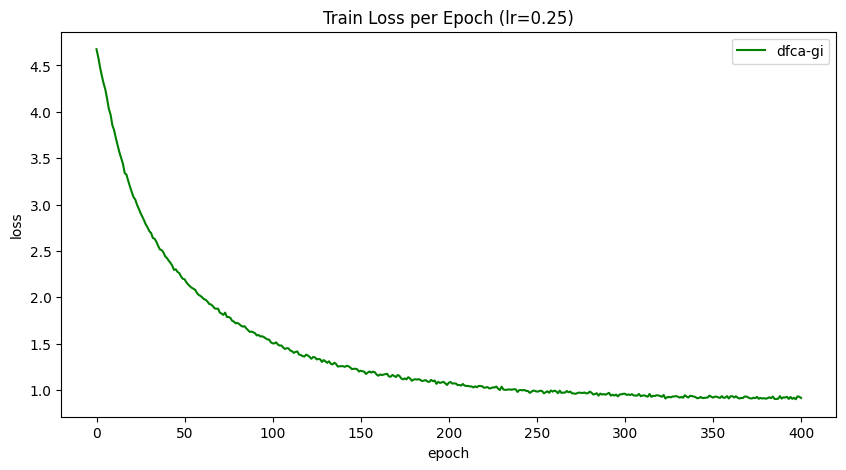

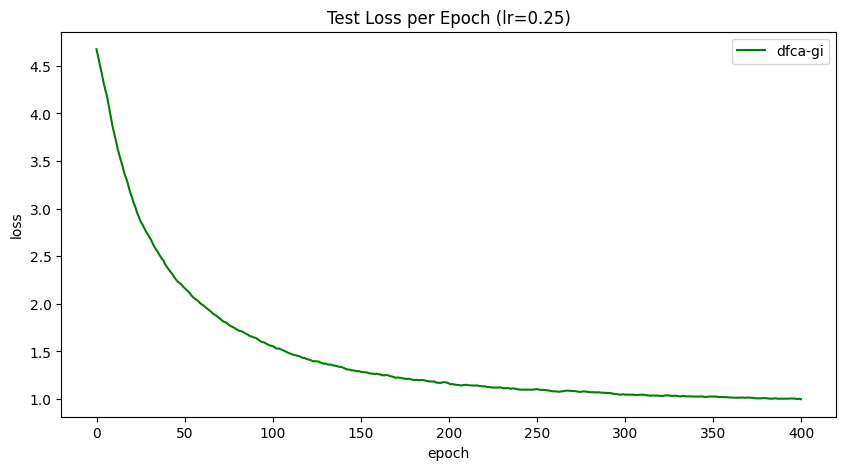

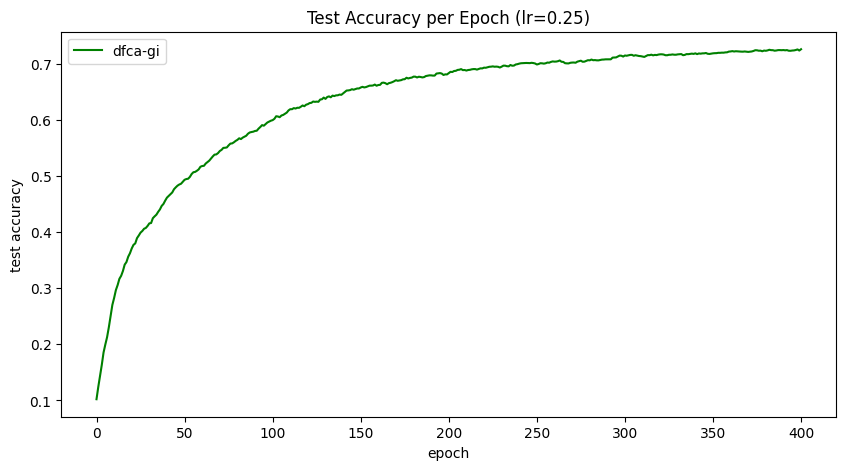

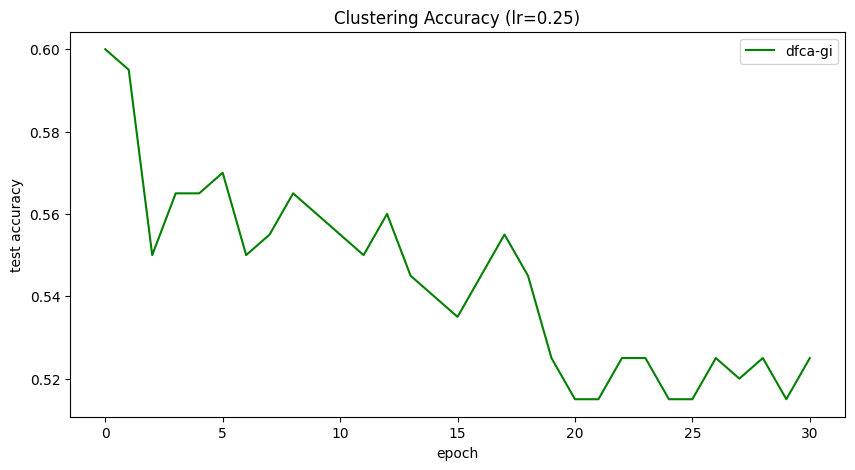

In [4]:

r_dfca_gi = {}

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(learning_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])

with open('res_dfca.pickle', 'wb') as f:
    pickle.dump(r_dfca_gi, f)

os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['train_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Train Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_test_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_test_acc.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['cl_acc'][l][:31], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Clustering Accuracy (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_cl_acc.png'))

